# **For CNN**

In [ ]:
import urllib.request
import scipy
from bs4 import *
import requests
from selenium import webdriver
import os
import lxml
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


In [ ]:
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')


Installation finished.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
!pip install webdriver_manager


In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
from selenium import webdriver

## **Download Audio (skip this step if already downloaded)**

In [ ]:
# with urllib.request.urlopen("https://librivox.org/search?primary_key=0&search_category=title&search_page=1&search_form=get_results") as url:
#     html = url.read()

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

names = []
temp_name = ""
temp_size = ""
counter = 1
for i in range(0, 220):
    print(i)
    url = "https://librivox.org/search?title=&author=&reader=&keywords=&genre_id=0&status=all&project_type=solo&recorded_language=&sort_order=catalog_date&search_page={}&search_form=advanced".format(i)
    ##browser = webdriver.PhantomJS('/content/drive/My Drive/btech project/phantomjs-2.1.1-windows/bin\phantomjs')
    ##browser = webdriver.PhantomJS(r'''\content\drive\My Drive\btech project\phantomjs-2.1.1-windows\bin\phantomjs''')
    from webdriver_manager.chrome import ChromeDriverManager

   ## browser = webdriver.Chrome(ChromeDriverManager().install())
    
    browser = webdriver.Chrome('chromedriver',options=options)
    browser.get(url)

    element = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME , "catalog-result"))
    )

    html = browser.page_source
    soup = BeautifulSoup(html, 'html5lib')    

    links = []
    for litag in soup.find_all('li', {'class': 'catalog-result'}):
        h = litag.find('h3')
        browser.get(h.a['href'])
        html2 = browser.page_source
        soup2 = BeautifulSoup(html2, 'html5lib')

        s = soup2.find('dl', {'class': 'product-details'})
            
        target =  s.find_all('dd')
        
        temp_name = target[3].get_text()
        temp_size = target[1].get_text()
        temp_size = temp_size.replace('MB','')

        if(temp_name in names):
            continue

        s = soup2.find('dl', {'class': 'listen-download'})
        
        target = s.find_all('dd')
        
        if float(temp_size) >= 25 and float(temp_size) <= 110:
            links.append(target[0].a['href'])
            names.append(temp_name)
            print(temp_name)

                                
#             for dtag in litag.find_all('dt'):
#             #                 print(dtag.span.text)
#             #                 print(dtag.a['href'])
#                 x = dtag.span.text
#                 x = x.replace('MB','')
#                 if float(x) >= 25 and float(x) <= 110:
#                         links.append(dtag.a['href'])
    browser.quit()
#     print(names)
    for link in links:
        localDestination = "/content/drive/My Drive/btech project/voice-classification-master/audio/audio{}.wav".format(counter)
        resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
        counter += 1
        
## Start at page 39

### **Unzip already processed audio books**

In [ ]:
    from zipfile import ZipFile

for i in range(0, 200):
    zipTest = ZipFile(r'''/content/drive/My Drive/btech project/voice-classification-master/audio/audio194.zip''', 'r')
    zipTest.extractall(r'''/content/drive/My Drive/btech project/voice-classification-master/audio/audio194''')

### **Convert into 5s segments**

In [ ]:
import subprocess
import os
root='/content/drive/My Drive/btech project/voice-classification-master/audio/'
path = "/usr/bin/ffmpeg"
i=1
##!cd '/content/drive/My Drive/btech project/voice-classification-master/audio/'
for subdir,dir,files in os.walk(root):
    
    ##in_path = '/content/drive/My Drive/btech project/voice-classification-master/audio/audio{}.wav'.format(i)
    
    if not os.path.exists(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs1/wav{}'''.format(i)):
        os.makedirs(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs1/wav{}'''.format(i))
    
    out_path = '/content/drive/My Drive/btech project/voice-classification-master/wavs1/wav{}/out%03d.wav'.format(i)
    print(i)
    ## !ffmpeg -i in_path -f segment -segment_time 5 -c out_path
    for f in files:
      in_path=subdir+"/"+f
      print(in_path)
      #Remove silences longer than 5 seconds
     # subprocess.call(['sox', in_path, in_path, 'silence 1 0.1 1% -1 0.5 1'])
      subprocess.call(['ffmpeg', '-i', in_path, '-f', 'segment', 
                     '-segment_time', '5', '-c', 'copy', out_path])
      
      
    i+=1

1
2
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_06_sienkiewicz_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_04_sienkiewicz_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_03_sienkiewicz_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_01_sienkiewicz_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_05_sienkiewicz_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio1/zachlebem_02_sienkiewicz_64kb.mp3
3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio2/concerninggraceandfreewill_10_bernardofclairvaux_64kb.mp3
/content/drive/My Drive/btech project/voice-classification-master/audio/audio2/concerninggraceandfreewill_09_bernardofclairvaux_64kb.mp3
/content/drive/My Drive/btech project/voic

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join

In [ ]:
!ls /usr/bin/ffmpeg



/usr/bin/ffmpeg


In [ ]:
!sudo add-apt-repository ppa:jon-severinsson/ffmpeg
!sudo apt-get update
!sudo apt-get install ffmpeg

Cannot add PPA: 'ppa:~jon-severinsson/ubuntu/ffmpeg'.
The user named '~jon-severinsson' has no PPA named 'ubuntu/ffmpeg'
Please choose from the following available PPAs:
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/jonathonf/ffmpeg-4/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/comp

In [ ]:
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join

AudioSegment.converter = r"/usr/bin/ffmpeg"

for i in range(0, 200):
    files = listdir(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs1/wav{}'''.format(i))
    
    if not os.path.exists(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav{}'''.format(i)):
        os.makedirs(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav{}'''.format(i))
    
    count = 1
    limit = 0
    print("i=",i)
    for f in files:
        if(limit == 720): break
        sound = AudioSegment.from_mp3(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs1/wav{}/{}'''.format(i, f))
        out_f = sound.export(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav{}/{}.wav'''.format(i, count), format="wav")
        out_f.close()
        count = count + 1
        limit = limit + 1

i= 162
i= 163
i= 164
i= 165
i= 166
i= 167
i= 168


KeyboardInterrupt: ignored

In [ ]:


!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


## **Turn Audio to Spectrograms**

In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa.display
#to play audio
import IPython.display as ipd
from matplotlib.pyplot import specgram

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

audio_fpath = "/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav100/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  407


In [6]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(221184,) 44100


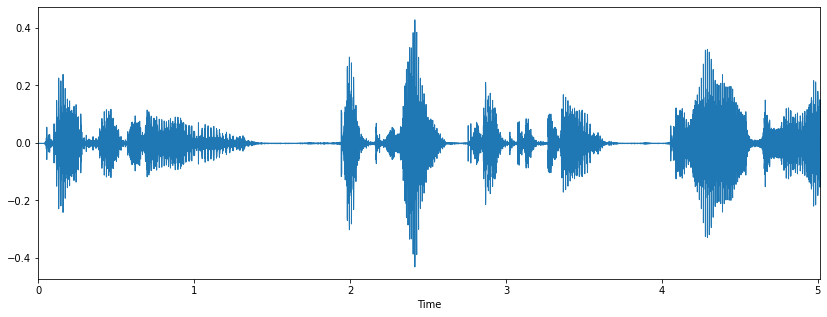

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
import wave

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


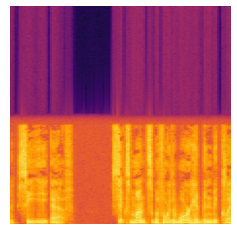

In [10]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(4,4))
fp = r'/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav50/5.wav'
X,sr = librosa.load(fp,sr=44100,mono=True,duration=10)
#         plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
#         plt.margins(x=0)
##specgram(np.array(X), Fs=44100)
plt.specgram(X, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
#plt.axis('tight')
plt.axis('off')
        ## plt.show()
plt.show()        
        ##plt.savefig(os.path.join(my_path,"test"+str(i)+".png"), bbox_inches='tight')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


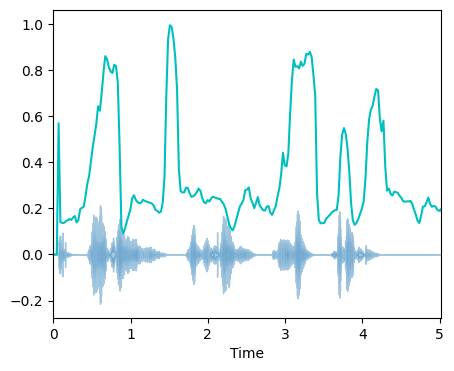

In [ ]:
import sklearn
print(plt.style.available)
plt.style.use('default')
spectral_centroids = librosa.feature.spectral_centroid(X, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(5, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='c')

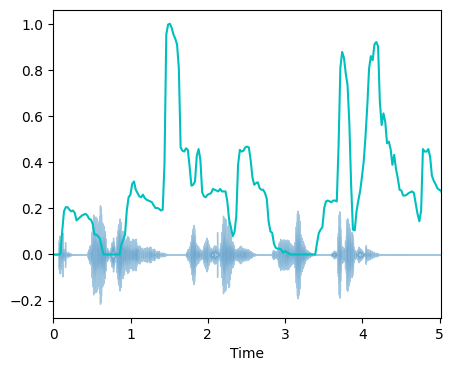

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(X+0.01, sr=sr)[0]
plt.figure(figsize=(5, 4))
librosa.display.waveplot(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='c')

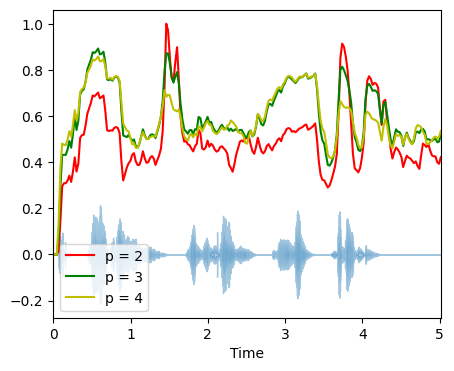

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(5, 4))
librosa.display.waveplot(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

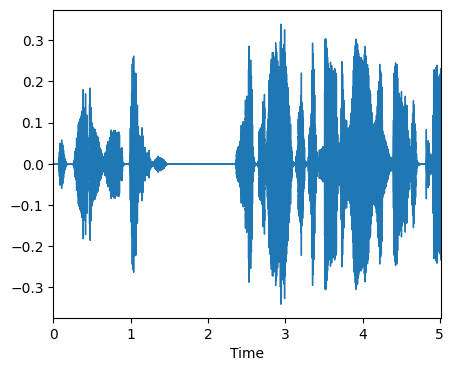

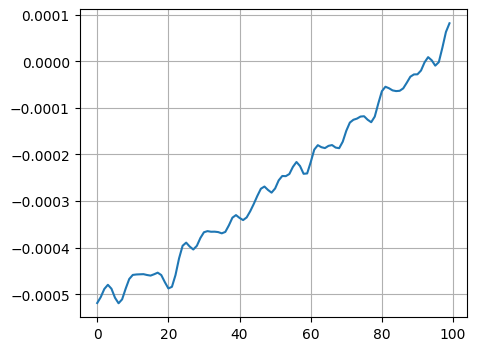

In [ ]:

#Plot the signal:
plt.figure(figsize=(5, 4))
librosa.display.waveplot(X, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(5, 4))
plt.plot(X[n0:n1])
plt.grid()

(20, 433)


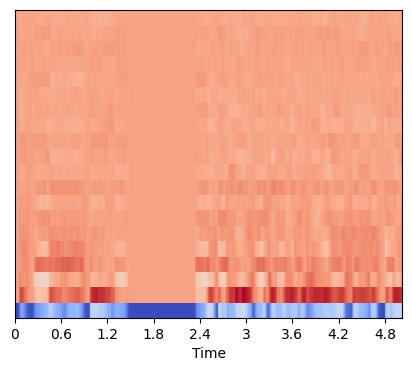

In [ ]:
mfccs = librosa.feature.mfcc(X, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(5, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

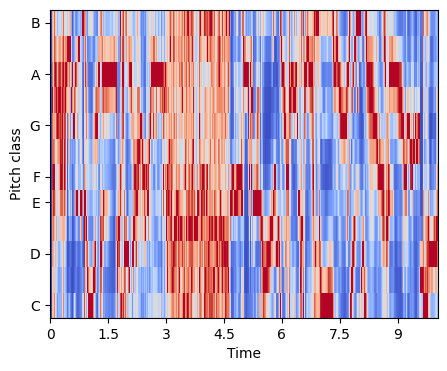

In [ ]:
chromagram = librosa.feature.chroma_stft(X, sr=sr, hop_length=2)
plt.figure(figsize=(5, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=2, cmap='coolwarm')

In [ ]:
def load_sound_files(file_paths):
    ##audio_clips = os.listdir(file_paths)
    raw_sounds = []
    i=0
    for dir,subdir,files in os.walk(file_paths):
      for f in files:
        fp=dir+'/'+f
        
        X,sr = librosa.load(fp,sr=44100,mono=True,duration=5)
        raw_sounds.append(X)
        i+=1
    return raw_sounds


def plot_specgram(raw_sounds,k):
  my_path=r'/content/drive/My Drive/btech project/voice-classification-master/speaker_final/speaker{}'.format(k)
  if not os.path.exists(my_path):
    os.makedirs(my_path)
#     fig = plt.figure()
#     fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    i=1
    for f in raw_sounds:
        cmap = plt.get_cmap('inferno')
        plt.figure(figsize=(8,8))
        plt.specgram(f, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
#         plt.axis('tight')
        plt.axis('off')
        ## plt.show()  
        i+=1
        plt.savefig(os.path.join(my_path,"test"+str(i)+".png"), bbox_inches='tight')
        plt.close('all')

In [ ]:
import os
##file_paths = r'/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav1/*.wav'
file_paths = r'/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/'

##for subdirs,dirs,files in os.walk(file_paths):
for i in range(162,200):
  print(i)
  my_path=os.path.join(file_paths,'wav{}'.format(i))
  print(my_path)
  rsounds = load_sound_files(my_path)
  plot_specgram(rsounds,i)
  i+=1


162
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav162


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


163
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav163


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


164
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav164


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


165
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav165


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


166
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav166


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


167
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav167


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


168
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav168


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


169
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav169
170
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav170
171
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav171
172
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav172
173
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav173
174
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav174
175
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav175
176
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav176
177
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav177
178
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav178
179
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav179
180
/content/drive/My

In [ ]:
import subprocess
import os

# 513 800 3
for i in range(0, 200):
      files = os.listdir(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs_final/wav{}'''.format(i))
      
      
      if not os.path.exists(r'''/content/drive/My Drive/btech project/voice-classification-master/speaker/speaker{}'''.format(i)):
          os.makedirs(r'''/content/drive/My Drive/btech project/voice-classification-master/speaker/speaker{}'''.format(i))
      
      count = 1
      for f in files:
          cmdstring = 'sox "{}" -n spectrogram -r -o "{}"'.format(r'''/content/drive/My Drive/btech project/voice-classification-master/wavs_final/wav{}/{}'''.format(i, f), r'''/content/drive/My Drive/btech project/voice-classification-master/speaker/speaker{}/{}.png'''.format(i, count))
          subprocess.call(cmdstring, shell=True)
          count = count + 1

# **For ANN**

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
import csv 
import os
import librosa
import numpy as np

In [ ]:
path='/content/drive/My Drive/btech project/voice-classification-master/newdata.csv'
file = open(path, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
!ffmpeg
from shutil import copyfile

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
!sudo apt-get install ffmpeg 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
PATH='/content/drive/My Drive/btech project/voice-classification-master/wavs_final1'

i=0
for dir,subdir,files in os.walk(PATH):
  
    print(dir)
    if(i==200):
        break
   
    j=0
    for f in files:
      #if(j==6):
       # break
      songname=f'{dir}/{f}'
      #if(songname.endswith(".wav")):
      #print(songname)
      y, sr = librosa.load(songname, mono=True, duration=30)
      rmse = librosa.feature.rmse(y=y)
      chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
      spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
      spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
      rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
      zcr = librosa.feature.zero_crossing_rate(y)
      mfcc = librosa.feature.mfcc(y=y, sr=sr)
      d=dir.replace(PATH,'')
      filename=d+'_'+f
      to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
      for e in mfcc:
                to_append += f' {np.mean(e)}'
      to_append+= f' {d}'
      file = open(path, 'a', newline='')
      with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())  
       # print(to_append)
        j+=1
       
    i+=1


/content/drive/My Drive/btech project/voice-classification-master/wavs_final1
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav2
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav3
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav4
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav5
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav6
/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav7


/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


/content/drive/My Drive/btech project/voice-classification-master/wavs_final1/wav8


In [ ]:
!sudo apt-get install libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate
